Nama Anggota Kelompok 3:
1. Alya Mirza Safira (21083010039)
2. Fiqih Pavira Andharluana (21083010042)
3. Hajjar Ayu Cahyani K. (21083010044)
4. Muhamad Haris Hartanto (21083010045)

In [2]:
import pandas as pd
import outlierdetection as od # predefined module & function
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Pembacaan Data

In [3]:
df = pd.read_csv('SeoulBikeData.csv', encoding = "ISO-8859-1")
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


# Praproses Data

## Pembersihan Data

In [4]:
# Mengubah nama semua feature menjadi huruf kecil dan mengganti spasi dengan underscore
df.columns = df.columns.str.lower().str.replace(' ', '_')
# Menghapus karakter "(...)" pada nama feature
df.columns = df.columns.str.replace('\(.*\)', '', regex=True)
# Menghapus karakter "_" pada akhir nama feature
df.columns = df.columns.str.replace('_$', '', regex=True)
# Menampilkan data
df

,date,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
# Memeriksa tipe data dari setiap feature
df.dtypes

date                      object
rented_bike_count          int64
hour                       int64
temperature              float64
humidity                   int64
wind_speed               float64
visibility                 int64
dew_point_temperature    float64
solar_radiation          float64
rainfall                 float64
snowfall                 float64
seasons                   object
holiday                   object
functioning_day           object
dtype: object

In [6]:
# Mengubah tipe data feature "hour" menjadi kategorikal (object)
df['hour'] = df['hour'].astype('object')

In [7]:
df.dtypes

date                      object
rented_bike_count          int64
hour                      object
temperature              float64
humidity                   int64
wind_speed               float64
visibility                 int64
dew_point_temperature    float64
solar_radiation          float64
rainfall                 float64
snowfall                 float64
seasons                   object
holiday                   object
functioning_day           object
dtype: object

## Pemeriksaan Missing Value

In [8]:
# Memeriksa jumlah missing value pada setiap feature
df.isnull().sum()

date                     0
rented_bike_count        0
hour                     0
temperature              0
humidity                 0
wind_speed               0
visibility               0
dew_point_temperature    0
solar_radiation          0
rainfall                 0
snowfall                 0
seasons                  0
holiday                  0
functioning_day          0
dtype: int64

## Pemeriksaan Outlier

In [9]:
# Inisialisasi nama feature numerik dalam bentuk list
numerical_features = ['temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall', 'snowfall']

# Mendapatkan nilai outlier minor dan major
all_outliers_minor = od.outlier_table(df[numerical_features], bounds_type='minor')
all_outliers_major = od.outlier_table(df[numerical_features], bounds_type='major')

In [10]:
# Menampilkan nilai outlier (minor)
all_outliers_minor

,Column,Lower Bound,Upper Bound,Outlier Value,Value Index
0,wind_speed,-1.2,4.4,4.5,82.0
1,wind_speed,-1.2,4.4,4.8,84.0
2,wind_speed,-1.2,4.4,5.4,85.0
3,wind_speed,-1.2,4.4,4.5,86.0
4,wind_speed,-1.2,4.4,5.8,87.0
...,...,...,...,...,...
1768,snowfall,0.0,0.0,0.3,8645.0
1769,snowfall,0.0,0.0,0.3,8646.0
1770,snowfall,0.0,0.0,0.3,8647.0
1771,snowfall,0.0,0.0,0.3,8648.0


In [11]:
# mendapatkan nilai unik dari kolom Column pada all_outliers_minor
all_outliers_minor['Column'].unique()

array(['wind_speed', 'solar_radiation', 'rainfall', 'snowfall'],
      dtype=object)

In [12]:
# Menampilkan nilai outlier (major)
all_outliers_major

,Column,Lower Bound,Upper Bound,Outlier Value,Value Index
0,wind_speed,-3.3,6.5,6.7,933.0
1,wind_speed,-3.3,6.5,7.4,3134.0
2,wind_speed,-3.3,6.5,7.2,3138.0
3,wind_speed,-3.3,6.5,7.3,3141.0
4,wind_speed,-3.3,6.5,6.9,6316.0
...,...,...,...,...,...
971,snowfall,0.0,0.0,0.3,8645.0
972,snowfall,0.0,0.0,0.3,8646.0
973,snowfall,0.0,0.0,0.3,8647.0
974,snowfall,0.0,0.0,0.3,8648.0


Setelah dilakukan validasi data, diketahui bahwa nilai outlier yang terdeteksi merupakan nilai yang valid dan wajar untuk kondisi cuaca tersebut. Oleh karena itu, diputuskan untuk tidak menghapus outlier tersebut.

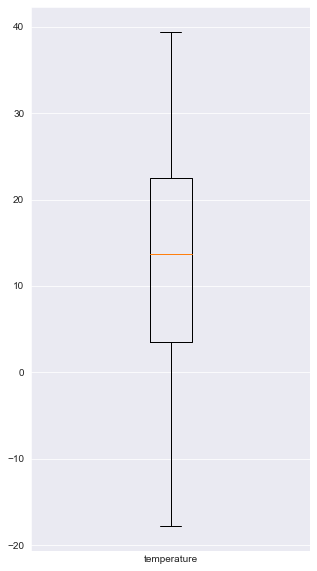

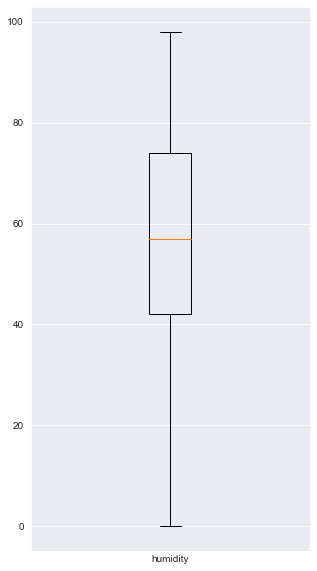

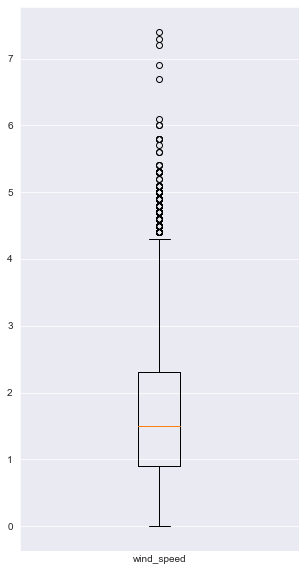

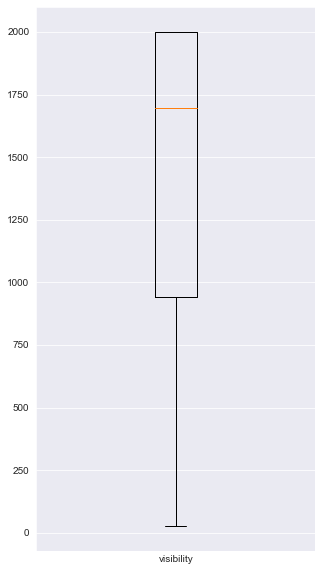

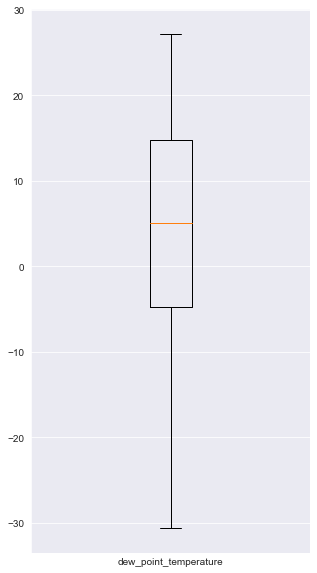

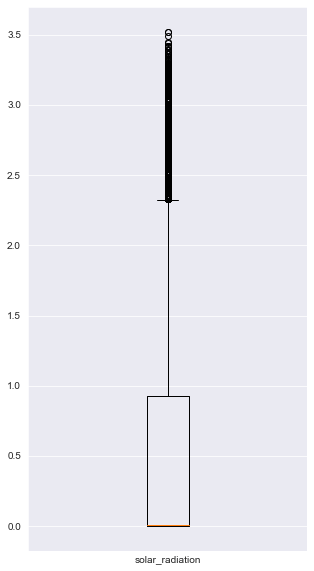

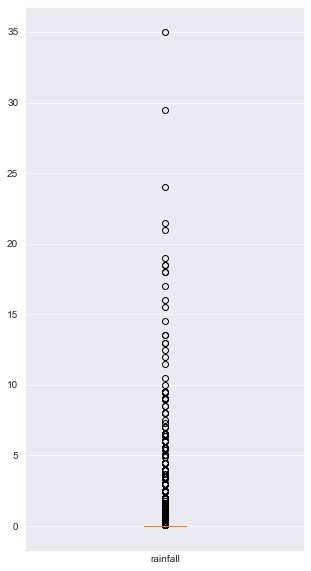

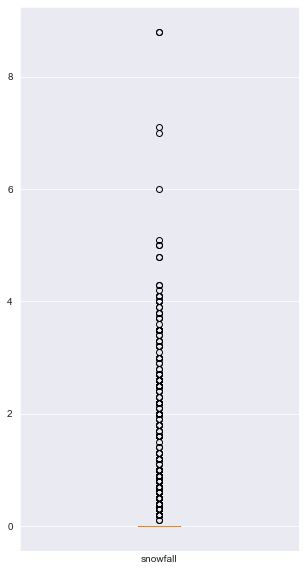

In [13]:
# boxplot untuk setiap feature numerik dengan orientasi vertikal dengan seaborn
from matplotlib import pyplot as plt
import seaborn as sns

for feature in numerical_features:
    plt.figure(figsize=(5, 10))
    # membuat boxplot dengan seaborn orientasi vertikal
    plt.boxplot(x=df[feature])
    # set x label
    plt.xlabel(feature)
    # hapus nilai x tick
    plt.xticks([])
    plt.show()

## Transformasi Data

In [14]:
# Mengonversi tipe data feature menjadi tipe datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

# Mengekstrak feature hari dan bulan dari feature date
df['day'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()

# Membuat feature week dengan nilai 'Weekend' jika feature day bernilai 'Saturday' atau 'Sunday', dan 'Weekdays' jika feature day bernilai 'Monday' sampai 'Friday'
df['week'] = df['day'].apply(lambda x: 'Weekend' if x == 'Saturday' or x == 'Sunday' else 'Weekdays')

# Menghapus feature date
df.drop('date', axis=1, inplace=True)

# Menampilkan data
df

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,seasons,holiday,functioning_day,day,month,week
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,Weekdays
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,Weekdays
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,Weekdays
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,Weekdays
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday,December,Weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,November,Weekdays
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,November,Weekdays
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,November,Weekdays
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,November,Weekdays


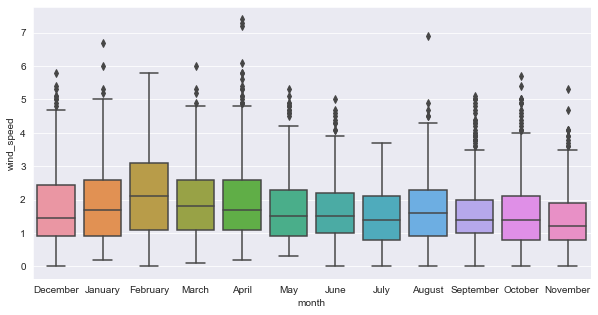

In [15]:
# wind_speed outlier by month
plt.figure(figsize=(10, 5))
sns.boxplot(x='month', y='wind_speed', data=df)
plt.show()

In [16]:
# Normalisasi data numerik dengan metode MinMax menggunakan fungsi MinMaxScaler dari sklearn

# Inisialisasi objek MinMaxScaler
scaler = MinMaxScaler()

# Memisahkan feature (X) dan target (y)
X = df.drop('rented_bike_count', axis=1)
y = df['rented_bike_count']

# Normalisasi feature numerik
X_scaled = scaler.fit_transform(X[numerical_features])

# Menggabungkan feature numerik yang sudah dinormalisasi dengan feature kategorikal
X_scaled = pd.DataFrame(X_scaled, columns=numerical_features)
X_scaled = pd.concat([X_scaled, X.drop(numerical_features, axis=1)], axis=1)

# Menampilkan data setelah proses transformasi
X_scaled

,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,hour,seasons,holiday,functioning_day,day,month,week
0,0.220280,0.377551,0.297297,1.000000,0.224913,0.0,0.0,0.0,0,Winter,No Holiday,Yes,Friday,December,Weekdays
1,0.215035,0.387755,0.108108,1.000000,0.224913,0.0,0.0,0.0,1,Winter,No Holiday,Yes,Friday,December,Weekdays
2,0.206294,0.397959,0.135135,1.000000,0.223183,0.0,0.0,0.0,2,Winter,No Holiday,Yes,Friday,December,Weekdays
3,0.202797,0.408163,0.121622,1.000000,0.224913,0.0,0.0,0.0,3,Winter,No Holiday,Yes,Friday,December,Weekdays
4,0.206294,0.367347,0.310811,1.000000,0.207612,0.0,0.0,0.0,4,Winter,No Holiday,Yes,Friday,December,Weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.384615,0.346939,0.351351,0.946275,0.351211,0.0,0.0,0.0,19,Autumn,No Holiday,Yes,Friday,November,Weekdays
8756,0.370629,0.377551,0.310811,1.000000,0.358131,0.0,0.0,0.0,20,Autumn,No Holiday,Yes,Friday,November,Weekdays
8757,0.356643,0.397959,0.040541,0.983781,0.358131,0.0,0.0,0.0,21,Autumn,No Holiday,Yes,Friday,November,Weekdays
8758,0.347902,0.418367,0.135135,0.928535,0.359862,0.0,0.0,0.0,22,Autumn,No Holiday,Yes,Friday,November,Weekdays


In [17]:
# normalisasi data numerik dengan metode z-score
from scipy import stats

# Memisahkan feature (X) dan target (y)
#X = df.drop('rented_bike_count', axis=1)
#y = df['rented_bike_count']

# Normalisasi feature numerik
X_scaled_z = stats.zscore(X[numerical_features])

# Menggabungkan feature numerik yang sudah dinormalisasi dengan feature kategorikal
X_scaled_z = pd.DataFrame(X_scaled_z, columns=numerical_features)
X_scaled_z = pd.concat([X_scaled_z, X.drop(numerical_features, axis=1)], axis=1)

# Menampilkan data setelah proses transformasi
X_scaled_z

,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,hour,seasons,holiday,functioning_day,day,month,week
0,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,0,Winter,No Holiday,Yes,Friday,December,Weekdays
1,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,1,Winter,No Holiday,Yes,Friday,December,Weekdays
2,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,2,Winter,No Holiday,Yes,Friday,December,Weekdays
3,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,3,Winter,No Holiday,Yes,Friday,December,Weekdays
4,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891,4,Winter,No Holiday,Yes,Friday,December,Weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,-0.726961,-1.189822,0.844486,0.751605,-1.100630,-0.655132,-0.1318,-0.171891,19,Autumn,No Holiday,Yes,Friday,November,Weekdays
8756,-0.793939,-1.042483,0.554978,0.925871,-1.070001,-0.655132,-0.1318,-0.171891,20,Autumn,No Holiday,Yes,Friday,November,Weekdays
8757,-0.860918,-0.944257,-1.375075,0.873263,-1.070001,-0.655132,-0.1318,-0.171891,21,Autumn,No Holiday,Yes,Friday,November,Weekdays
8758,-0.902779,-0.846031,-0.699556,0.694064,-1.062344,-0.655132,-0.1318,-0.171891,22,Autumn,No Holiday,Yes,Friday,November,Weekdays


# Eksplorasi Data

## Korelasi Antar Feature

In [18]:
# nilai unik kolom season pada df
df['seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

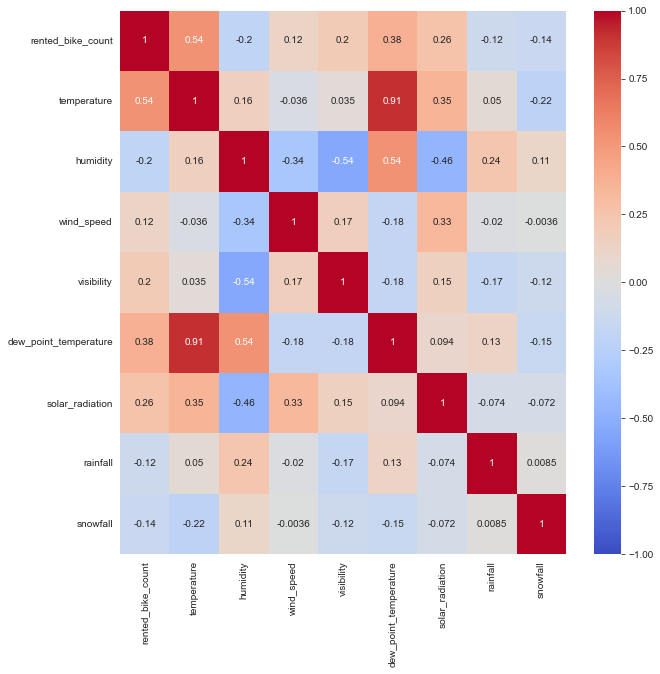

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung korelasi antar feature
corr = df.corr(numeric_only=True)

# Menampilkan korelasi antar feature
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm' , vmax=1, vmin=-1)
plt.show()

Berdasarkan hasil korelasi tersebut, dapat dilihat bahwa feature temperature memiliki korelasi yang tinggi dengan feature dew_point_temperature.
Korelasi antar variabel independen (feature) disebut dengan Multikolinieritas. Hal tersebut dapat menyebabkan model menjadi tidak stabil dan tidak dapat diinterpretasikan dengan baik.
Oleh karena itu, feature dew_point_temperature akan dihapus dari data.

In [20]:
# Memeriksa multikolinieritas dengan nilai VIF (Variance Inflation Factor)

def calculate_vif(x):
    vif_df = pd.DataFrame()
    vif_df['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif_df['features'] = x.columns

    return vif_df

In [21]:
# Menghitung VIF
vif = calculate_vif(X[numerical_features])
vif

,VIF,features
0,29.075866,temperature
1,5.069743,humidity
2,4.517664,wind_speed
3,9.051931,visibility
4,15.201989,dew_point_temperature
5,2.821604,solar_radiation
6,1.079919,rainfall
7,1.118903,snowfall


In [22]:
# Menghitung VIF setelah menghapus feature dew_point_temperature
vif = calculate_vif(df[numerical_features])
vif

,VIF,features
0,29.075866,temperature
1,5.069743,humidity
2,4.517664,wind_speed
3,9.051931,visibility
4,15.201989,dew_point_temperature
5,2.821604,solar_radiation
6,1.079919,rainfall
7,1.118903,snowfall


# Feature Engineering

## Feature Transformation

In [23]:
# Inisialisasi nama feature kategorikal dalam bentuk list
categorical_features = ['hour', 'seasons', 'holiday', 'functioning_day', 'day', 'month', 'week']

# Membuat dummy variable untuk feature kategorikal
X_scaled_z = pd.get_dummies(X_scaled_z, columns=categorical_features, drop_first=True)
X_scaled_z

C:\Users\zoxrl\AppData\Local\Temp\ipykernel_7008\2596873743.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_scaled_z = pd.get_dummies(X_scaled_z, columns=categorical_features, drop_first=True)


,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,hour_1,hour_2,...,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,week_Weekend
0,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,0,1,...,0,0,0,0,0,0,0,0,0,0
3,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,-0.726961,-1.189822,0.844486,0.751605,-1.100630,-0.655132,-0.1318,-0.171891,0,0,...,0,0,0,0,0,0,1,0,0,0
8756,-0.793939,-1.042483,0.554978,0.925871,-1.070001,-0.655132,-0.1318,-0.171891,0,0,...,0,0,0,0,0,0,1,0,0,0
8757,-0.860918,-0.944257,-1.375075,0.873263,-1.070001,-0.655132,-0.1318,-0.171891,0,0,...,0,0,0,0,0,0,1,0,0,0
8758,-0.902779,-0.846031,-0.699556,0.694064,-1.062344,-0.655132,-0.1318,-0.171891,0,0,...,0,0,0,0,0,0,1,0,0,0


In [39]:
# Membuat dummy variable untuk feature kategorikal
X_scaled_minmax = pd.get_dummies(X_scaled, columns=categorical_features, drop_first=True)
X_scaled_minmax

C:\Users\zoxrl\AppData\Local\Temp\ipykernel_7008\3130382604.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_scaled_minmax = pd.get_dummies(X_scaled, columns=categorical_features, drop_first=True)


,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,hour_1,hour_2,...,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,week_Weekend
0,0.220280,0.377551,0.297297,1.000000,0.224913,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.215035,0.387755,0.108108,1.000000,0.224913,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.206294,0.397959,0.135135,1.000000,0.223183,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0.202797,0.408163,0.121622,1.000000,0.224913,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.206294,0.367347,0.310811,1.000000,0.207612,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.384615,0.346939,0.351351,0.946275,0.351211,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
8756,0.370629,0.377551,0.310811,1.000000,0.358131,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
8757,0.356643,0.397959,0.040541,0.983781,0.358131,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
8758,0.347902,0.418367,0.135135,0.928535,0.359862,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [24]:
# Membuat dummy variable untuk feature kategorikal
X_d = pd.get_dummies(X, columns=categorical_features, drop_first=True)
X_d

C:\Users\zoxrl\AppData\Local\Temp\ipykernel_7008\239572065.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_d = pd.get_dummies(X, columns=categorical_features, drop_first=True)


,temperature,humidity,wind_speed,visibility,dew_point_temperature,solar_radiation,rainfall,snowfall,hour_1,hour_2,...,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,week_Weekend
0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
8756,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
8757,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
8758,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Pembuatan Model Regresi

## Pembagian Data Training dan Data Testing

In [40]:
# Membagi data menjadi data training dan data testing dengan perbandingan 75:25
X_train, X_test, y_train, y_test = train_test_split(X_scaled_z, y, test_size=0.25, random_state=1)

## Regresi Linier

In [41]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

## Regresi Ridge

In [42]:
# Menggunakan gridsearch untuk mencari parameter alpha terbaik
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_ridge = GridSearchCV(Ridge(), param_grid)
grid_ridge.fit(X_train, y_train)
grid_ridge.best_params_

{'alpha': 1}

In [43]:
# Membuat model regresi ridge dengan parameter terbaik
ridge_model = Ridge(alpha=grid_ridge.best_params_['alpha'])
ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

## Regresi Lasso

In [44]:
# Menggunakan gridsearch untuk mencari parameter alpha terbaik
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_lasso = GridSearchCV(Lasso(), param_grid)
grid_lasso.fit(X_train, y_train)
grid_lasso.best_params_

C:\Users\zoxrl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.653e+07, tolerance: 2.206e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\zoxrl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.992e+07, tolerance: 2.181e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\zoxrl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

{'alpha': 0.01}

In [45]:
# Membuat model regresi lasso dengan parameter terbaik
lasso_model = Lasso(alpha=grid_lasso.best_params_['alpha'])
lasso_model.fit(X_train, y_train)

C:\Users\zoxrl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.110e+05, tolerance: 2.743e+05
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.01)

## Regresi Elastic Net

In [46]:
# Menggunakan gridsearch untuk mencari parameter alpha, l1_ratio, dan max_iter terbaik
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'l1_ratio': [0.1, 0.25, 0.5, 0.75, 1],
              'max_iter': [1000, 2000, 3000, 4000, 5000]
              }
grid = GridSearchCV(ElasticNet(), param_grid)
grid.fit(X_train, y_train)
grid.best_params_

C:\Users\zoxrl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.367e+07, tolerance: 2.206e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\zoxrl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.425e+07, tolerance: 2.181e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\zoxrl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

{'alpha': 0.001, 'l1_ratio': 0.5, 'max_iter': 1000}

In [47]:
# Membuat model regresi elastic net dengan parameter terbaik
en_model = ElasticNet(alpha=grid.best_params_['alpha'], l1_ratio=grid.best_params_['l1_ratio'], max_iter=grid.best_params_['max_iter'])
en_model.fit(X_train, y_train)

C:\Users\zoxrl\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.224e+07, tolerance: 2.743e+05
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.001)

# Evaluasi Model Regresi

In [52]:
def get_model_metrics(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    return train_rmse, test_rmse, train_r2, test_r2

In [53]:
# Regresi Linear
linear_train_rmse, linear_test_rmse, linear_train_r2, linear_test_r2 = get_model_metrics(linear_model, X_train, X_test, y_train, y_test)

# Regresi Ridge
ridge_train_rmse, ridge_test_rmse, ridge_train_r2, ridge_test_r2 = get_model_metrics(ridge_model, X_train, X_test, y_train, y_test)

# Regresi Lasso
lasso_train_rmse, lasso_test_rmse, lasso_train_r2, lasso_test_r2 = get_model_metrics(lasso_model, X_train, X_test, y_train, y_test)

# Regresi Elastic Net
en_train_rmse, en_test_rmse, en_train_r2, en_test_r2 = get_model_metrics(en_model, X_train, X_test, y_train, y_test)

In [54]:
# Menampilkan hasil evaluasi model dalam bentuk tabel
model_metrics = pd.DataFrame({
    'Model': ['Linear', 'Ridge', 'Lasso', 'Elastic Net'],
    'RMSE (Training)': [linear_train_rmse, ridge_train_rmse, lasso_train_rmse, en_train_rmse],
    'RMSE (Testing)': [linear_test_rmse, ridge_test_rmse, lasso_test_rmse, en_test_rmse],
    'R-Square (Training)': [linear_train_r2, ridge_train_r2, lasso_train_r2, en_train_r2],
    'R-Square (Testing)': [linear_test_r2, ridge_test_r2, lasso_test_r2, en_test_r2]
})

model_metrics

,Model,RMSE (Training),RMSE (Testing),R-Square (Training),R-Square (Testing)
0,Linear,353.639162,349.486461,0.700506,0.702917
1,Ridge,353.643286,349.493548,0.700499,0.702905
2,Lasso,353.639436,349.480050,0.700505,0.702928
3,Elastic Net,353.680065,349.540589,0.700437,0.702825


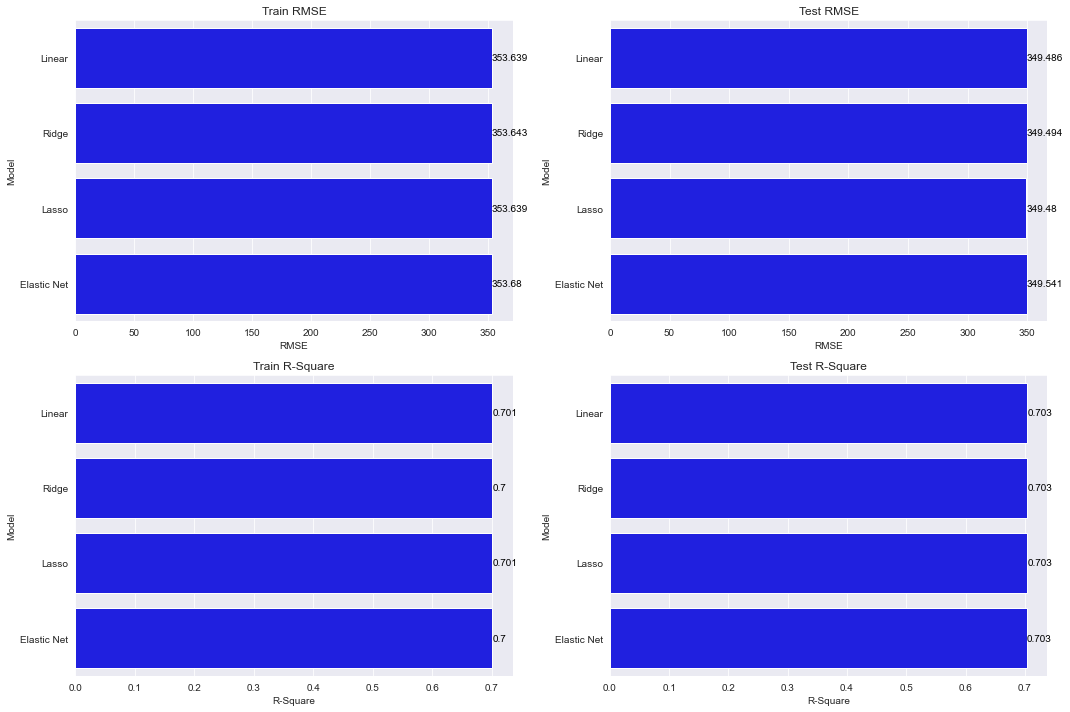

In [55]:
# Visualisasi hasil evaluasi model
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

sns.barplot(x='RMSE (Training)', y='Model', data=model_metrics, color='Blue', ax=axs[0, 0])
for i, v in enumerate(model_metrics['RMSE (Training)']):
    axs[0, 0].text(v+0.001, i, str(round(v, 3)), color='black', va='center')
axs[0, 0].set_title('Train RMSE')
axs[0, 0].set_xlabel('RMSE')
axs[0, 0].set_ylabel('Model')

sns.barplot(x='RMSE (Testing)', y='Model', data=model_metrics, color='Blue', ax=axs[0, 1])
for i, v in enumerate(model_metrics['RMSE (Testing)']):
    axs[0, 1].text(v+0.001, i, str(round(v, 3)), color='black', va='center')
axs[0, 1].set_title('Test RMSE')
axs[0, 1].set_xlabel('RMSE')
axs[0, 1].set_ylabel('Model')

sns.barplot(x='R-Square (Training)', y='Model', data=model_metrics, color='Blue', ax=axs[1, 0])
for i, v in enumerate(model_metrics['R-Square (Training)']):
    axs[1, 0].text(v+0.001, i, str(round(v, 3)), color='black', va='center')
axs[1, 0].set_title('Train R-Square')
axs[1, 0].set_xlabel('R-Square')
axs[1, 0].set_ylabel('Model')

sns.barplot(x='R-Square (Testing)', y='Model', data=model_metrics, color='Blue', ax=axs[1, 1])
for i, v in enumerate(model_metrics['R-Square (Testing)']):
    axs[1, 1].text(v+0.001, i, str(round(v, 3)), color='black', va='center')
axs[1, 1].set_title('Test R-Square')
axs[1, 1].set_xlabel('R-Square')
axs[1, 1].set_ylabel('Model')

plt.tight_layout()
plt.show()